#### 05 - Categorizing and Tagging Words

Resource: https://www.nltk.org/book/ch05.html 

In [1]:
import nltk

In [2]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
pos_tags = nltk.pos_tag(text)
pos_tags

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [3]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [4]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
[nltk.tag.str2tuple(t) for t in sent.split()][:50:5]

[('The', 'AT'),
 ('a', 'AT'),
 (',', ','),
 ('and', 'CC'),
 ('which', 'WDT'),
 ('well', 'QL'),
 ('accepted', 'VBN'),
 ('the', 'AT'),
 ('governments', 'NNS')]

In [5]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [6]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

#### Universal Part-of-Speech Tagset
|Tag|Meaning|English Examples|
|:-:|:-----:|:--------------:|
|ADJ|adjective|new, good, high, special, big, local|
|ADP|adposition|on, of, at, with, by, into, under|
|ADV|adverb|really, already, still, early, now|
|CONJ|conjunction|and, or, but, if, while, although|
|DET|determiner, article|the, a, some, most, every, no, which|
|NOUN|noun|year, home, costs, time, Africa|
|NUM|numeral|twenty-four, fourth, 1991, 14:24|
|PRT|particle|at, on, out, over per, that, up, with|
|PRON|pronoun|he, their, her, its, my, I, us|
|VERB|verb|is, say, told, given, playing, would|
|.|punctuation marks|. , ; !|
|X|other|ersatz, esprit, dunno, gr8, univeristy|

In [7]:
brown_news_tagged = nltk.corpus.brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common(20)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [8]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common(15)]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

In [9]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB'][:100:10]

['is',
 'were',
 'did',
 'added',
 'fell',
 'offered',
 'become',
 'give',
 'designed',
 'owns']

In [10]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [11]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

In [12]:
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['VBN'])[:100:10]

['been',
 'held',
 'scheduled',
 'acquired',
 'issued',
 'planned',
 'come',
 'raised',
 'continued',
 'boosted']

In [13]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))
for tag in sorted(tagdict):
  print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

In [14]:
brown_learned_text = nltk.corpus.brown.words(categories='learned')
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))[:50:5]

[',',
 'apt',
 'been',
 'chose',
 'differed',
 'extremely',
 'in',
 'observed',
 'represent',
 'shortened']

In [15]:
brown_learned_tags = nltk.corpus.brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_learned_tags) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [16]:
from nltk.corpus import brown
import nltk

def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)
i = 0
while i < 10:
    process(brown.tagged_sents()[i])  # Corrected the typo
    i += 1  # Increment i to avoid infinite loop

combined to achieve


In [17]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
  if len(data[word]) > 3:
    tags = [tag for (tag, _) in data[word].most_common()]
    print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


In [18]:
from collections import defaultdict
counts = defaultdict(int)
for (word, tag) in nltk.corpus.brown.tagged_words(categories='news', tagset='universal'):
  counts[tag] += 1

counts['NOUN']

30654

In [19]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

In [20]:
last_letters = defaultdict(list)
words = nltk.corpus.words.words('en')
for word in words:
  key = word[-2:]
  last_letters[key].append(word)

last_letters['ly'][:10]

['abactinally',
 'abandonedly',
 'abasedly',
 'abashedly',
 'abashlessly',
 'abbreviately',
 'abdominally',
 'abhorrently',
 'abidingly',
 'abiogenetically']

In [21]:
last_letters['zy'][:15]

['blazy',
 'bleezy',
 'blowzy',
 'boozy',
 'breezy',
 'bronzy',
 'buzzy',
 'Chazy',
 'cozy',
 'crazy',
 'dazy',
 'dizzy',
 'dozy',
 'enfrenzy',
 'fezzy']

In [22]:
anagrams = nltk.Index((''.join(sorted(w)), w) for w in words)
anagrams['aeilnrt']

['entrail', 'latrine', 'ratline', 'reliant', 'retinal', 'trenail']

In [23]:

patterns = [
    (r'.*ing$', 'VBG'),                # gerunds
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'.*\'s$', 'NN$'),                # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                      # nouns (default)
]

In [24]:
regexp_tagger = nltk.RegexpTagger(patterns)
brown_sents = nltk.corpus.brown.sents(categories='news')
brown_tagged_sents = nltk.corpus.brown.tagged_sents(categories='news')
regexp_tagger.tag(brown_sents[3])[:50:5]

[('``', 'NN'),
 ('of', 'NN'),
 ("''", 'NN'),
 (',', 'NN'),
 ('interest', 'NN'),
 ('the', 'NN'),
 ('the', 'NN'),
 ("''", 'NN')]

In [25]:
regexp_tagger.accuracy(brown_tagged_sents)

0.20186168625812995

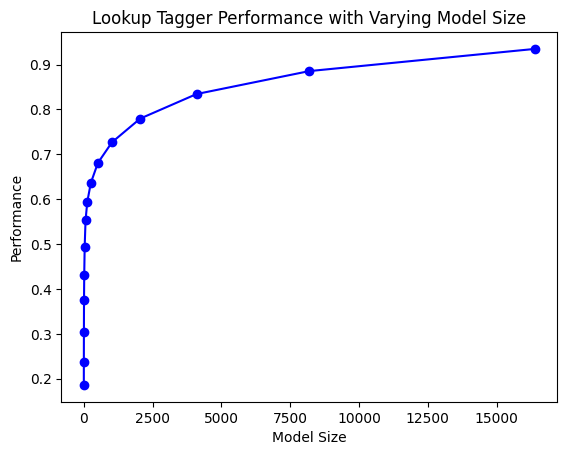

In [26]:
# Natural Language Toolkit: code_baseline_tagger
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.accuracy(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

display()

In [27]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [28]:
unigram_tagger.accuracy(brown_tagged_sents)

0.9349006503968017

In [29]:
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.accuracy(test_sents)

0.8121200039868434

In [30]:
ngram_tagger0 = nltk.DefaultTagger('NN')
ngram_tagger1 = nltk.UnigramTagger(train_sents, backoff=ngram_tagger0)
ngram_tagger2 = nltk.BigramTagger(train_sents, backoff=ngram_tagger1)
ngram_tagger3 = nltk.TrigramTagger(train_sents, backoff=ngram_tagger2)

In [31]:
print(f"Default Tagger Accuracy: {ngram_tagger0.accuracy(test_sents)}") # Use only to train unigrams
print(f"Unigram Tagger Accuracy: {ngram_tagger1.accuracy(test_sents)}")
print(f"Bigram Tagger Accuracy: {ngram_tagger2.accuracy(test_sents)}")
print(f"Trigram Tagger Accuracy: {ngram_tagger3.accuracy(test_sents)}")

Default Tagger Accuracy: 0.1262832652247583
Unigram Tagger Accuracy: 0.8361407355726104
Bigram Tagger Accuracy: 0.8452108043456593
Trigram Tagger Accuracy: 0.843317053722715


In [32]:
from pickle import dump
with open('ngram_tagger2.pkl', 'wb') as output:
  dump(ngram_tagger2, output, -1)

In [33]:
from pickle import load
with open('ngram_tagger2.pkl', 'rb') as input:
  tagger = load(input)

In [34]:
text = """The board's action shows what free enterprise
    is up against in our complex maze of regulatory laws ."""
tokens = text.split()
tagger.tag(tokens)

[('The', 'AT'),
 ("board's", 'NN$'),
 ('action', 'NN'),
 ('shows', 'NNS'),
 ('what', 'WDT'),
 ('free', 'JJ'),
 ('enterprise', 'NN'),
 ('is', 'BEZ'),
 ('up', 'RP'),
 ('against', 'IN'),
 ('in', 'IN'),
 ('our', 'PP$'),
 ('complex', 'JJ'),
 ('maze', 'NN'),
 ('of', 'IN'),
 ('regulatory', 'NN'),
 ('laws', 'NNS'),
 ('.', '.')]